# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [3]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

## Загрузка и подготовка данных

In [4]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
for i in [data_0, data_1, data_2]:
    display(i.head(3))
    display(i.describe())
    print()
    display(i.info())
    print('Нулевых запасов в скважине', i[i['product']==0]['id'].count())
    print('Дубликаты по id:', i['id'].duplicated().sum())
    print()
    print('---------------------------------')
    print()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Нулевых запасов в скважине 1
Дубликаты по id: 10

---------------------------------



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Нулевых запасов в скважине 8235
Дубликаты по id: 4

---------------------------------



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Нулевых запасов в скважине 1
Дубликаты по id: 4

---------------------------------



В трех таблицах находятся данные геологоразведки для трех регионов. Таблицы одинакового формата и содержат следующие столбцы:
* `id` — уникальный идентификатор скважины;
* `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
* `product` — объём запасов в скважине (тыс. баррелей).

Пропусков в таблицах нет. В каждой таблице присутствуют дубликаты по столбцу `id`, возможно некоторые скважины были ошибочно исследованы повторно. Удалим дубликаты, оставив последнюю запись.

In [5]:
data_0 = data_0.drop_duplicates(subset=['id'], keep='last').reset_index(drop=True)
data_1 = data_1.drop_duplicates(subset=['id'], keep='last').reset_index(drop=True)
data_2 = data_2.drop_duplicates(subset=['id'], keep='last').reset_index(drop=True)

In [6]:
for i in [data_0, data_1, data_2]:
    print('Дубликаты по id:', i['id'].duplicated().sum())

Дубликаты по id: 0
Дубликаты по id: 0
Дубликаты по id: 0


В таблице, которая относится к региону 1 много 0 в столбце `product` по сравнению с другими регионами, возможно это потеря данных. Посмотрим на график распределения значения по столбцу `product` в каждом регионе.

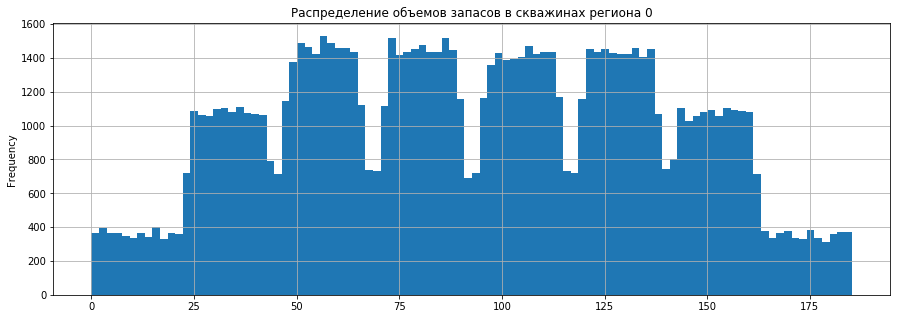

In [7]:
data_0['product'].plot(kind='hist', bins=100, grid=True,
                       title='Распределение объемов запасов в скважинах региона 0')

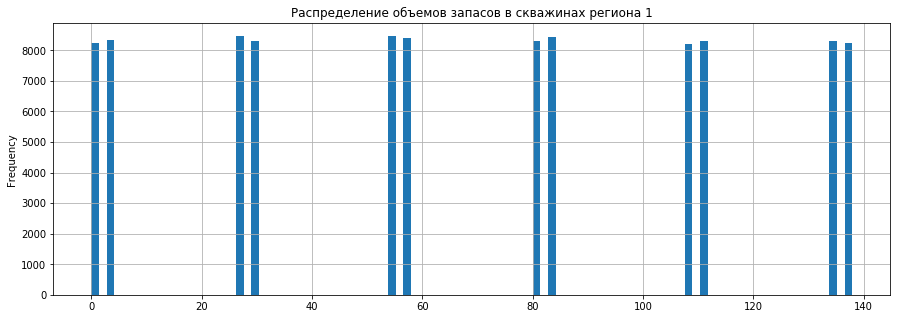

In [8]:
data_1['product'].plot(kind='hist', bins=100, grid=True, 
                       title='Распределение объемов запасов в скважинах региона 1')

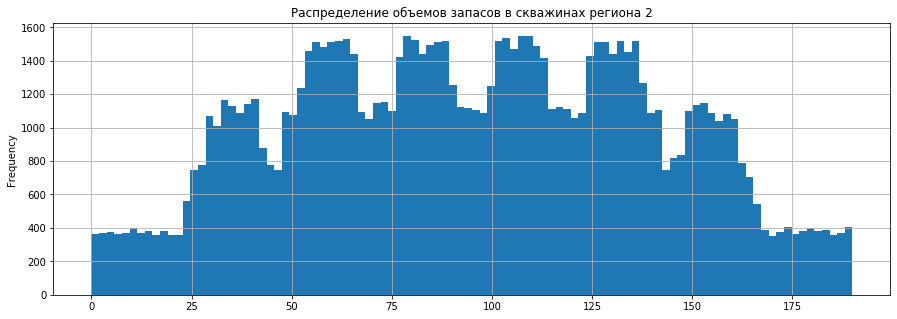

In [9]:
data_2['product'].plot(kind='hist', bins=100, grid=True, 
                       title='Распределение объемов запасов в скважинах региона 2')

График региона 1 очень сильно отличается по распределению от графиков регионов 0 и 2. Будем учитывать это при дальнейшей работе.

Данные исследованы, очищены от дубликатов и подготовлены к дальнейшей работе.

## Обучение и проверка модели

Напишем функции для разбиения данных и обучения модели и вывода результатов.

In [10]:
def split_data(data):
    """
    Выделяет из данных целевой признак и признаки для работы модели. 
    Разбивает данные на обучающую и валидирующую выборки.
    """
    features = data[['f0', 'f1', 'f2']]
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size = 0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

In [11]:
def model_res(features_train, features_valid, target_train, target_valid):
    """
    Обучает модель, делает предсказание на валидирующей выборке.
    Выводит на экран метрики R2 и RMSE и средние запасы сырья.
    Возвращает модель и предсказания модели.
    """
    model = LinearRegression()
    model.fit(features_train, target_train)
    pred = model.predict(features_valid)
    print('R2 score', model.score(features_valid, target_valid))
    print('RMSE:', np.sqrt(mean_squared_error(target_valid, pred)))
    print('Средний предсказанный запас сырья', np.mean(pred))
    print('Средний реальный запас сырья',np.mean(target_valid))
    return model, pd.Series(pred)

Последовательно исследуем три региона.

### Регион 0

In [12]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_data(data_0)

In [13]:
model_0, pred_0 = model_res(features_train_0, features_valid_0, target_train_0, target_valid_0)

R2 score 0.2686065064871146
RMSE: 37.92658327086352
Средний предсказанный запас сырья 92.595815339811
Средний реальный запас сырья 92.34784935243168


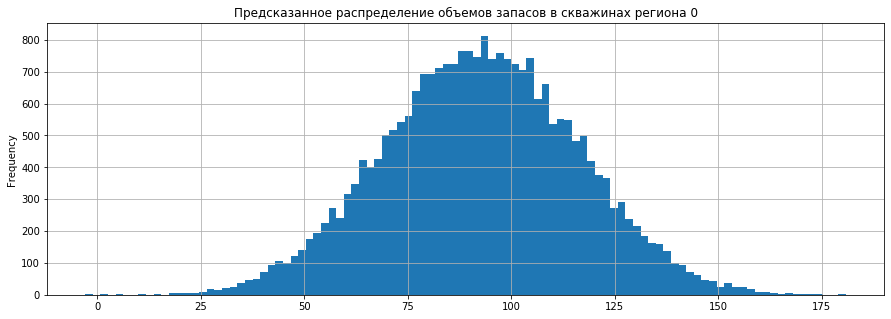

In [14]:
pred_0.plot(kind='hist', bins=100, grid=True, 
                       title='Предсказанное распределение объемов запасов в скважинах региона 0')

### Регион 1

In [15]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(data_1)

In [16]:
model_1, pred_1 = model_res(features_train_1, features_valid_1, target_train_1, target_valid_1)

R2 score 0.9996289491331055
RMSE: 0.8877441757012697
Средний предсказанный запас сырья 68.52866705781803
Средний реальный запас сырья 68.53697799242255


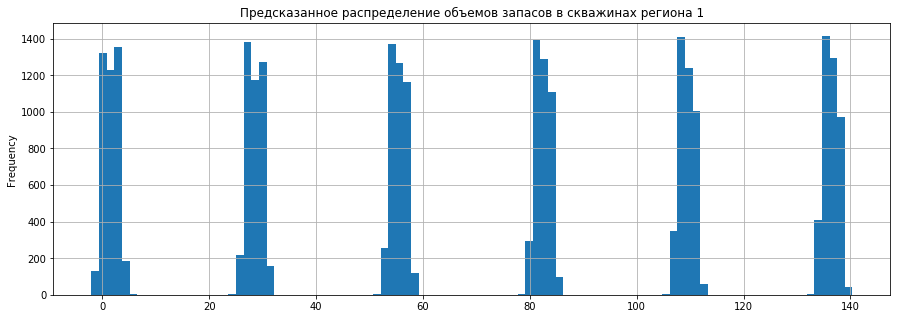

In [17]:
pred_1.plot(kind='hist', bins=100, grid=True, 
                       title='Предсказанное распределение объемов запасов в скважинах региона 1')

### Регион 2

In [18]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(data_2)

In [19]:
model_2, pred_2 = model_res(features_train_2, features_valid_2, target_train_2, target_valid_2)

R2 score 0.196359615376824
RMSE: 40.18554498370539
Средний предсказанный запас сырья 94.93593212204372
Средний реальный запас сырья 94.56578475991805


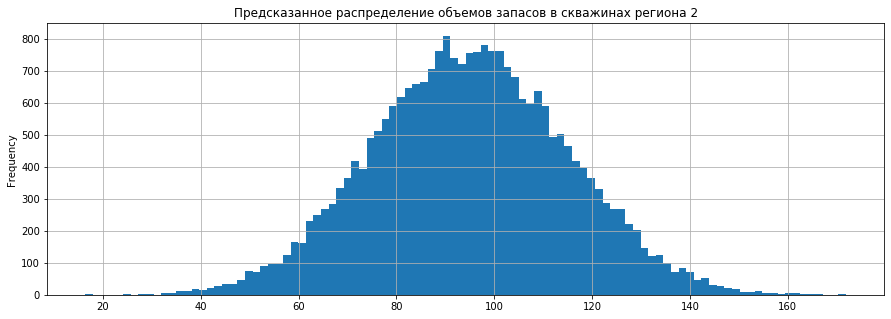

In [20]:
pred_2.plot(kind='hist', bins=100, grid=True, 
                       title='Предсказанное распределение объемов запасов в скважинах региона 2')

Мы исследовали три региона. В первом и третьем результаты похожи, средний запас нефти достаточно высокий - 92 и 94 тыс баррелей соответственно, точность моделей также близка, но достаточно низкая, RMSE первой 37,93, третьей - 40,19. Во втором регионе средний запас ниже - 68 тыс баррелей, а точность модели очень высокая, RMSE 0,89.

## Подготовка к расчёту прибыли

Все ключевые значения для расчётов сохраним в отдельных переменных.

In [21]:
max_explored_wells =  500
chosen_wells = 200
budget = 10e9
price_per_unit = 450000
loss_prob = 0.025

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [22]:
one_well_cost = budget / chosen_wells
min_volume = one_well_cost / price_per_unit
print('Средний объем нефти на точку для безубыточной разработки', int(min_volume), 'тыс. барелей')

Средний объем нефти на точку для безубыточной разработки 111 тыс. барелей


Средний объем нефти на точку для безубыточной разработки выше, чем средний объем нефти на точку во всех трех регионах. Без отбора наиболее подходящих точек разработка будет убыточной.

## Расчёт прибыли и рисков 

In [23]:
def oil_profit_calculation(target, probabilities, count):
    """
    Функция для расчета прибыли
    """
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_unit * selected.sum() - budget

In [24]:
state = np.random.RandomState(12345)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=max_explored_wells)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target_sample, probs_sample, chosen_wells)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    print('Средняя прибыль по региону = {:.2f} руб.'.format(average))
    print('95% доверительный интервал от {:.2f} до {:.2f} руб.'.format(lower, upper))
    print('Процент риска {:.2%}'.format(risk))
    return average, lower, upper, risk

In [25]:
bootstrap_1000(target_valid_0.reset_index(drop=True), pred_0)

Средняя прибыль по региону = 427442112.37 руб.
95% доверительный интервал от -127167882.34 до 965901983.47 руб.
Процент риска 6.00%


(427442112.3721394, -127167882.34295167, 965901983.4715176, 0.06)

In [26]:
bootstrap_1000(target_valid_1.reset_index(drop=True), pred_1)

Средняя прибыль по региону = 505287967.29 руб.
95% доверительный интервал от 94544651.51 до 983574641.70 руб.
Процент риска 1.10%


(505287967.29328614, 94544651.50721541, 983574641.695121, 0.011)

In [27]:
bootstrap_1000(target_valid_2.reset_index(drop=True), pred_2)

Средняя прибыль по региону = 344563372.19 руб.
95% доверительный интервал от -230002074.76 до 919601673.78 руб.
Процент риска 11.00%


(344563372.1939603, -230002074.76368693, 919601673.777746, 0.11)

По результатам расчетов, прибыльными могут оказаться разработки во всех трех регионах, однако только во втором регионе в 95% доверительный интервал не входят отрицательные значения, то есть убытки и процент риска там минимален и входит в заданный лимит в 2,5%. Поэтому для разработки мы рекомендуем выбрать второй регион.